In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
#machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [33]:
df = pd.read_csv ('insurance.csv')

In [34]:
df.head() #Muestra los 5 primeros 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
df.info() #Ver informacion del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
df.describe() #Cantidad total por feature

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [37]:
#PreProcessing 
#sex
le = LabelEncoder() #Codificar variables categoricas a numeros
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)
#smoker
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)

In [38]:
df.corr() #Correlacion de las variables

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [39]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

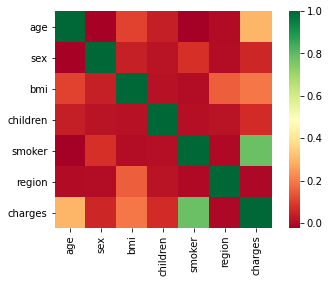

In [40]:
sns.heatmap(df.corr(), square=True, cmap="RdYlGn") #grafico de calor

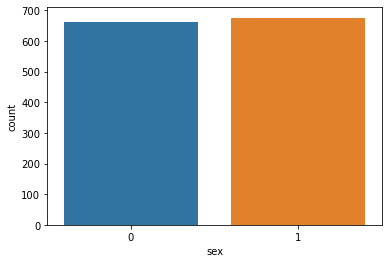

In [41]:
#Analize univariable
sns.countplot(data = df, x="sex") #Grafico de barras

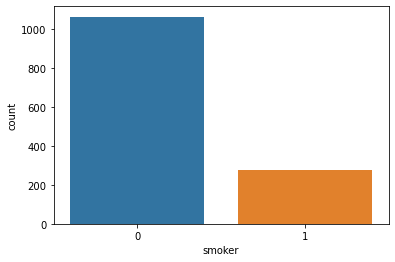

In [42]:
sns.countplot(data = df, x="smoker") #Grafico de barras

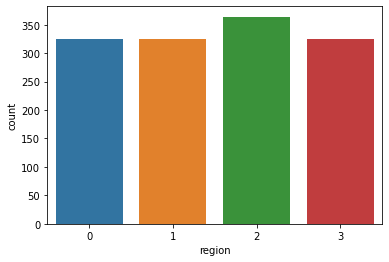

In [43]:
sns.countplot(data = df, x="region") #Grafico de barras

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <a list of 10 Patch objects>)

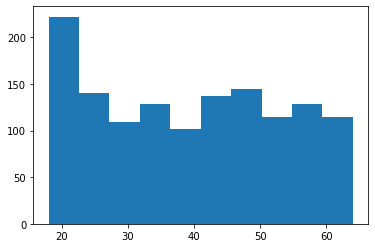

In [44]:
plt.hist(data = df, x='age') #Creacion de histograma

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

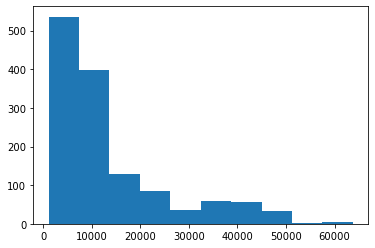

In [45]:
plt.hist(data = df, x='charges') 

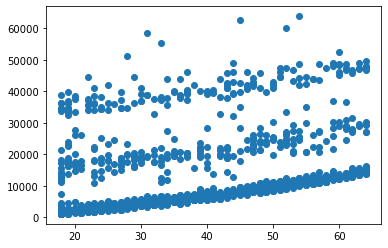

In [46]:
#Analisis multivariable (Variables mas correlacionadas)
plt.scatter(data=df, x='age', y='charges' )

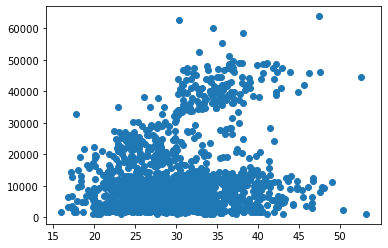

In [53]:
plt.scatter(data=df, x='bmi', y='charges' )

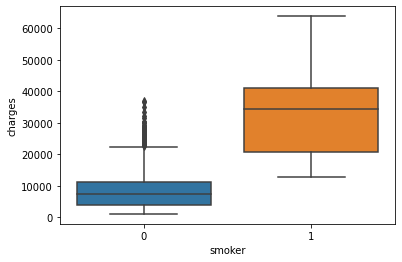

In [47]:
sns.boxplot(data=df, x='smoker', y='charges') #Grafico de caja

In [59]:
#Model Building
x = df.drop(['charges'], axis = 1)
y = df['charges']
print(x.shape)

(1338, 6)


In [60]:
#Preprocessing
x = StandardScaler().fit_transform(x)
x = PolynomialFeatures(degree = 5, include_bias = False).fit_transform(x)
print(x.shape)

(1338, 461)


In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state= 0)

In [62]:
lr = LinearRegression()
lr.fit(x_train,y_train) #entrena el algoritmo
print('coef {}'.format(lr.coef_))

coef [ 1.59914304e+11  2.65179485e+12  3.43574497e+13  1.54383661e+13
  8.38328928e+12 -3.06947521e+13  1.59138206e+12  3.77403170e+12
  4.97885838e+12 -3.34296805e+12  2.43764993e+12 -3.34047945e+12
 -9.43992047e+13  3.96273526e+12 -1.23939257e+13  1.57490129e+13
 -1.97254181e+11  2.01863599e+12 -5.56609536e+12  4.42163026e+12
 -7.70851201e+12 -2.76250317e+12  1.35538226e+12  2.14123025e+12
  6.27500179e+13 -2.51719485e+12 -6.66523936e+13  5.50594545e+12
  5.64084495e+11 -1.83519854e+12  1.64091688e+12  7.76980768e+12
  1.52591305e+12 -6.12623682e+12  1.90807000e+12 -8.68294719e+10
  2.51031255e+12 -1.73253268e+12 -1.38677084e+12  1.86610336e+12
  7.00878735e+12  9.78152747e+11  5.54739439e+11 -6.02596221e+12
 -5.21994773e+10  5.87318377e+12  4.22776787e+12 -5.59843392e+12
  8.79668619e+12 -1.36120674e+13 -4.07095797e+12  1.55359177e+13
  1.35079379e+13 -2.37665670e+11  1.38523599e+12  6.33699639e+12
  1.96158637e+12 -2.26532827e+12 -5.07938984e+12 -1.54091166e+12
 -2.75831651e+12 -1.

In [63]:
#Metrics (Cuanto ajusta el modelo, o precision)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))
#visualizacion de overfitting

0.8898621160267591
0.6579027502073993


In [76]:
#Regularitacion Tecnics por overfitting
#ridge Regression
from sklearn.linear_model import Ridge, Lasso

In [75]:
ridge = Ridge(alpha = 0.4, normalize = True)
ridge.fit(x_train, y_train)
print(ridge.score(x_train,y_train))
print(ridge.score(x_test,y_test))

0.8504838690580397
0.8484729160352016


In [82]:
lasso = Lasso(alpha=0.1, tol= 0.1)
lasso.fit(x_train,y_train)
print(lasso.score(x_train,y_train))
print(lasso.score(x_test,y_test))

0.8596341524414035
0.8391303043824782
